In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from itertools import combinations

In [50]:
# German Credit
probs_file = '/home/dhasade/audits/ml-audits/data/german_credit/all_nks.pkl'
ts = 1000

In [59]:
# propublica
probs_file = '/home/dhasade/audits/ml-audits/data/propublica/all_nks.pkl'
ts = 6172

In [39]:
# folktables
probs_file = '/home/dhasade/audits/ml-audits/data/folktables/all_nks.pkl'
ts = 5916565

In [60]:
with open(probs_file, 'rb') as f:
    ns = pickle.load(f)

In [61]:
n = 5

In [62]:
def get_max_value(nested_dict):
    max_value = 0
    for _, v in nested_dict.items():
        if isinstance(v, dict):
            v = get_max_value(v)
        if v > max_value:
            max_value = v
    return max_value

In [63]:
def get_sum_value(nested_dict):
    sum_value = 0
    for _, v in nested_dict.items():
        if isinstance(v, dict):
            v = get_sum_value(v)
        sum_value += v
    return sum_value

In [64]:
max_ns = [[] for _ in range(1, n+1)]

for k in range(1, n+1):
    possible_collaborators = list(range(n))
    agent_combinations_list = list(combinations(possible_collaborators, k))

    for agent_combination in agent_combinations_list:
        agent_comb_str = ''.join([str(elem) for elem in agent_combination])
        
        base_agent = agent_combination[0]
        rem_agents_str = agent_comb_str[1:]

        ns_dict = ns[base_agent][k-1][rem_agents_str]
        max_ns[k-1].append(get_max_value(ns_dict))
        # print(get_sum_value(ns_dict))


In [65]:
max_ns

[[4997, 3175, 4825, 3970, 4087],
 [2626, 3896, 3286, 3439, 2459, 2196, 2329, 3002, 3357, 2845],
 [1962, 1836, 1990, 2465, 2811, 2396, 1588, 1862, 1680, 2287],
 [1323, 1585, 1427, 1906, 1311],
 [1104]]

In [57]:
max_ps = [[x/ts for x in max_ns[k]] for k in range(n)]
# max_ps

In [109]:
avg_ps = [np.mean(max_ps[k]) for k in range(n)]
min_ps = [np.min(max_ps[k]) for k in range(n)]
max_ps = [np.max(max_ps[k]) for k in range(n)]

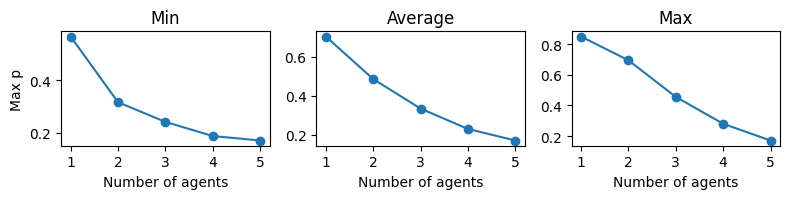

In [113]:
# create 3 subplots for min_ps, avg_ps and max_ps
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(8, 2.1))

# add grid to the subplots
# for i in range(3):
#     ax[i].grid(True)

# plot min_ps vs k
ax[0].plot(range(1, n+1), min_ps, marker='o')
ax[0].set_title('Min')
ax[0].set_xlabel('Number of agents')
ax[0].set_ylabel('Max p')

# plot avg_ps vs k
ax[1].plot(range(1, n+1), avg_ps, marker='o')
ax[1].set_title('Average')
ax[1].set_xlabel('Number of agents')
# ax[1].set_ylabel('Max p')

# plot max_ps vs k
ax[2].plot(range(1, n+1), max_ps, marker='o')
ax[2].set_title('Max')
ax[2].set_xlabel('Number of agents')
# ax[2].set_ylabel('Max p')

plt.tight_layout()

# plt.savefig('../results/prob_values/german_credit_max_p.pdf', dpi=300, bbox_inches='tight')
# plt.savefig('../results/prob_values/propublica_max_p.pdf', dpi=300, bbox_inches='tight')
# plt.savefig('../results/prob_values/folktables_max_p.pdf', dpi=300, bbox_inches='tight')

In [111]:
# create a dataframe to store the min, avg and max values
df = pd.DataFrame({'Min': min_ps, 'Average': avg_ps, 'Max': max_ps, 'k': range(1, n+1)})


In [112]:
# df.to_csv('../results/prob_values/german_credit_max_p.csv', index=False)
# df.to_csv('../results/prob_values/propublica_max_p.csv', index=False)
df.to_csv('../results/prob_values/folktables_max_p.csv', index=False)


In [11]:
# save max_ns to a file
# each row is a comma separated list of max_ns for a particular k
with open('../results/prob_values/german_credit_max_ns_all.csv', 'w') as f:
    for k in range(n):
        # write k
        f.write(str(k+1) + ',')
        f.write(','.join([str(x) for x in max_ps[k]]) + '\n')

In [20]:
# save max_ns to a file
# each row is a comma separated list of max_ns for a particular k
with open('../results/prob_values/propublica_max_ns_all.csv', 'w') as f:
    for k in range(n):
        # write k
        f.write(str(k+1) + ',')
        f.write(','.join([str(x) for x in max_ps[k]]) + '\n')

In [29]:
# save max_ns to a file
# each row is a comma separated list of max_ns for a particular k
with open('../results/prob_values/folktables_max_ns_all.csv', 'w') as f:
    for k in range(n):
        # write k
        f.write(str(k+1) + ',')
        f.write(','.join([str(x) for x in max_ps[k]]) + '\n')

In [115]:
s = 6
params = {
   'legend.fontsize': s,
   'legend.title_fontsize': s,
   'xtick.labelsize': 6,
   'ytick.labelsize': 6,
   'axes.labelsize': s+1,
   'text.usetex': False,
   # 'figure.figsize': [2.3, 1.3],
   'figure.figsize': [3.5, 1.4],
   'lines.linewidth': 1,
   'lines.markersize': 3,
   'axes.titlesize': s,
   }

# set rc params
plt.rcParams.update(params)
# no background for the legend
plt.rc('legend', frameon=False)    # no background for the legend

In [97]:
# Folktables
probs_file = '/home/dhasade/audits/ml-audits/data/folktables/all_nks.pkl'
ts = 5916565

with open(probs_file, 'rb') as f:
    ns = pickle.load(f)

n = 5

max_ns = [[] for _ in range(1, n+1)]

for k in range(1, n+1):
    possible_collaborators = list(range(n))
    agent_combinations_list = list(combinations(possible_collaborators, k))

    for agent_combination in agent_combinations_list:
        agent_comb_str = ''.join([str(elem) for elem in agent_combination])
        
        base_agent = agent_combination[0]
        rem_agents_str = agent_comb_str[1:]

        ns_dict = ns[base_agent][k-1][rem_agents_str]
        max_ns[k-1].append(get_max_value(ns_dict))

max_ps = [[x/ts for x in max_ns[k]] for k in range(n)]


# create data points from max ps
xs1 = []; ys1 = []
for k in range(n):
    # sample a small number between 0 and 1
    # to add some noise to the data points
    noise = np.random.uniform(0, 0.2, len(max_ps[k]))
    xs1.extend([k+1+noise[i] for i in range(len(max_ps[k]))])
    ys1.extend([max_ps[k][i] for i in range(len(max_ps[k]))])

In [98]:
# German Credit
probs_file = '/home/dhasade/audits/ml-audits/data/german_credit/all_nks.pkl'
ts = 1000

with open(probs_file, 'rb') as f:
    ns = pickle.load(f)

n = 5

max_ns = [[] for _ in range(1, n+1)]

for k in range(1, n+1):
    possible_collaborators = list(range(n))
    agent_combinations_list = list(combinations(possible_collaborators, k))

    for agent_combination in agent_combinations_list:
        agent_comb_str = ''.join([str(elem) for elem in agent_combination])
        
        base_agent = agent_combination[0]
        rem_agents_str = agent_comb_str[1:]

        ns_dict = ns[base_agent][k-1][rem_agents_str]
        max_ns[k-1].append(get_max_value(ns_dict))

max_ps = [[x/ts for x in max_ns[k]] for k in range(n)]

# create data points from max ps
xs2 = []; ys2 = []
for k in range(n):
    # sample a small number between 0 and 1
    # to add some noise to the data points
    noise = np.random.uniform(0, 0.2, len(max_ps[k]))
    xs2.extend([k+1+noise[i] for i in range(len(max_ps[k]))])
    ys2.extend([max_ps[k][i] for i in range(len(max_ps[k]))])

In [99]:
# propublica
probs_file = '/home/dhasade/audits/ml-audits/data/propublica/all_nks.pkl'
ts = 6172

with open(probs_file, 'rb') as f:
    ns = pickle.load(f)

n = 5

max_ns = [[] for _ in range(1, n+1)]

for k in range(1, n+1):
    possible_collaborators = list(range(n))
    agent_combinations_list = list(combinations(possible_collaborators, k))

    for agent_combination in agent_combinations_list:
        agent_comb_str = ''.join([str(elem) for elem in agent_combination])
        
        base_agent = agent_combination[0]
        rem_agents_str = agent_comb_str[1:]

        ns_dict = ns[base_agent][k-1][rem_agents_str]
        max_ns[k-1].append(get_max_value(ns_dict))

max_ps = [[x/ts for x in max_ns[k]] for k in range(n)]

# create data points from max ps
xs3 = []; ys3 = []
for k in range(n):
    # sample a small number between 0 and 1
    # to add some noise to the data points
    noise = np.random.uniform(0, 0.2, len(max_ps[k]))
    xs3.extend([k+1+noise[i] for i in range(len(max_ps[k]))])
    ys3.extend([max_ps[k][i] for i in range(len(max_ps[k]))])

In [100]:
# regression line y = 1/2x
reg_xs = np.linspace(1, 5, 100)
reg_ys = [1/(2*x) for x in reg_xs]

Text(0, 0.5, 'Relative size of \n largest stratum')

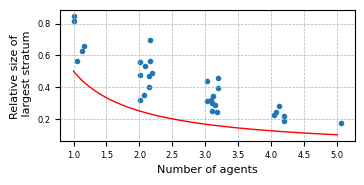

In [101]:
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.scatter(xs1, ys1)
plt.plot(reg_xs, reg_ys, color='red')
plt.xlabel('Number of agents')
plt.ylabel('Relative size of \n largest stratum')

# plot_name = 'ft_largest_stratum.pdf'
# plt.savefig(f'/home/dhasade/audits/ml-audits/results/ECAI/plots/{plot_name}', bbox_inches='tight', dpi=300)

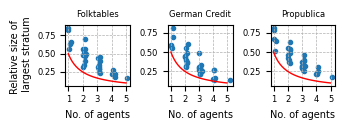

In [116]:
# make 1 x 3 subplots
fig, ax = plt.subplots(nrows=1, ncols=3)

# add grid to the subplots
for i in range(3):
    ax[i].grid(True, which='both', linestyle='--', linewidth=0.5)

# scatter each dataset across the subplots
ax[0].scatter(xs1, ys1)
ax[1].scatter(xs2, ys2)
ax[2].scatter(xs3, ys3)

# plot the regression line y = 1/2x
for i in range(3):
    ax[i].plot(reg_xs, reg_ys, color='red')

# set the x and y labels
ax[0].set_xlabel('No. of agents')
ax[0].set_ylabel('Relative size of \n largest stratum')

ax[1].set_xlabel('No. of agents')
ax[2].set_xlabel('No. of agents')

# set the title for each subplot
ax[0].set_title('Folktables')
ax[1].set_title('German Credit')
ax[2].set_title('Propublica')

# show all xticks
for i in range(3):
    ax[i].set_xticks(range(1, 6))

plt.tight_layout()

plot_name = 'largest_stratum.pdf'
plt.savefig(f'/home/dhasade/audits/ml-audits/results/ECAI/plots/{plot_name}', bbox_inches='tight', dpi=300)